In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

# 生成数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = np.where(y == 0, -1, 1)  # 将标签转换为 -1 和 1

# 保存为 DataFrame
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Label"] = y
df.to_csv("perceptron_dataset.csv", index=False)

print("Dataset saved as perceptron_dataset.csv")

Dataset saved as perceptron_dataset.csv


In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)
                if y[idx] * y_pred <= 0:
                    self.weights += self.learning_rate * y[idx] * x_i
                    self.bias += self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


In [4]:
# 加载数据
data = pd.read_csv("perceptron_dataset.csv")
X = data[["Feature1", "Feature2"]].values
y = data["Label"].values

# 创建和训练模型
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)
print("Training completed!")


Training completed!


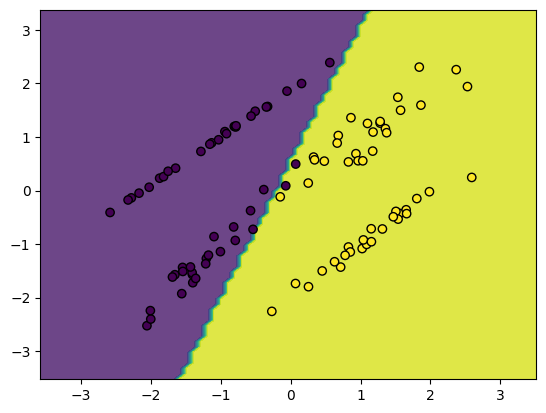

In [5]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.show()

plot_decision_boundary(X, y, perceptron)
